# Code for running regression on Movie data

In [2]:
#Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from datetime import datetime
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import scipy.stats as stats
import calendar
from sklearn.linear_model import LassoCV

%matplotlib inline


In [4]:
df = pd.read_csv('animation_movies.csv')
df.head()

,Unnamed: 0,movie_name,domestic_gross,foreign_gross,world_gross,production_budget_x,release_date,distributor,runtime,rating,directors,writers,actors
0,0,Everyone's Hero,14523101.0,2104087.0,16627188,NaN,2006-09-15,Fox,88.0,G,[],[],"[u'Raven-Symone', u'Forest Whitaker']"
1,1,Fire and Ice,760883.0,NaN,857522,NaN,1983-08-26,GKIDS,93.0,PG,[],[],[]
2,2,Light Years,370698.0,12572253.0,12947880,NaN,1988-01-29,Eleven Arts,116.0,Unrated,[],[],[]
3,3,Ratchet & Clank,8821329.0,NaN,8821329,NaN,2016-04-29,Focus Features,94.0,PG,[],[],"[u'Rosario Dawson', u'Paul Giamatti', u'John G..."
4,4,Home (2015),177397510.0,208644097.0,386041607,135000000.0,2015-03-27,Fox,94.0,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']"


In [5]:
#Code To convert the money to 2016 rates, using cpi values
df_cpi = pd.read_csv('cpi_values.csv')
df_cpi.index = df_cpi.Year
df_cpi.drop('Year', axis=1, inplace=True)
df_cpi.columns

Index([u'Avg'], dtype='object')

In [6]:
cpi_2016 = int(df_cpi.loc[2016])

In [8]:
#Convert the series objects to requisite forms
df['release_date'] = pd.to_datetime(df['release_date'])
df['month'] = df['release_date'].dt.month
df['year'] = df['release_date'].dt.year
df.head()

,Unnamed: 0,movie_name,domestic_gross,foreign_gross,world_gross,production_budget_x,release_date,distributor,runtime,rating,directors,writers,actors,month,year
0,0,Everyone's Hero,14523101.0,2104087.0,16627188,NaN,2006-09-15,Fox,88.0,G,[],[],"[u'Raven-Symone', u'Forest Whitaker']",9,2006
1,1,Fire and Ice,760883.0,NaN,857522,NaN,1983-08-26,GKIDS,93.0,PG,[],[],[],8,1983
2,2,Light Years,370698.0,12572253.0,12947880,NaN,1988-01-29,Eleven Arts,116.0,Unrated,[],[],[],1,1988
3,3,Ratchet & Clank,8821329.0,NaN,8821329,NaN,2016-04-29,Focus Features,94.0,PG,[],[],"[u'Rosario Dawson', u'Paul Giamatti', u'John G...",4,2016
4,4,Home (2015),177397510.0,208644097.0,386041607,135000000.0,2015-03-27,Fox,94.0,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']",3,2015


In [9]:
#Merge cpi data
adjusted_df = df.merge(df_cpi, how='left', left_on='year', right_index=True)
adjusted_df.head()

,Unnamed: 0,movie_name,domestic_gross,foreign_gross,world_gross,production_budget_x,release_date,distributor,runtime,rating,directors,writers,actors,month,year,Avg
0,0,Everyone's Hero,14523101.0,2104087.0,16627188,NaN,2006-09-15,Fox,88.0,G,[],[],"[u'Raven-Symone', u'Forest Whitaker']",9,2006,201.600
1,1,Fire and Ice,760883.0,NaN,857522,NaN,1983-08-26,GKIDS,93.0,PG,[],[],[],8,1983,99.600
2,2,Light Years,370698.0,12572253.0,12947880,NaN,1988-01-29,Eleven Arts,116.0,Unrated,[],[],[],1,1988,118.300
3,3,Ratchet & Clank,8821329.0,NaN,8821329,NaN,2016-04-29,Focus Features,94.0,PG,[],[],"[u'Rosario Dawson', u'Paul Giamatti', u'John G...",4,2016,240.007
4,4,Home (2015),177397510.0,208644097.0,386041607,135000000.0,2015-03-27,Fox,94.0,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']",3,2015,237.017


In [10]:
df['domestic_gross'] = adjusted_df['domestic_gross']*cpi_2016/adjusted_df.Avg

In [11]:
df['foreign_gross'] = adjusted_df['foreign_gross']*cpi_2016/adjusted_df.Avg
df['production_budget_x'] = adjusted_df['production_budget_x']*cpi_2016/adjusted_df.Avg

In [12]:
df.head()

,Unnamed: 0,movie_name,domestic_gross,foreign_gross,world_gross,production_budget_x,release_date,distributor,runtime,rating,directors,writers,actors,month,year
0,0,Everyone's Hero,1.728941e+07,2.504865e+06,16627188,NaN,2006-09-15,Fox,88.0,G,[],[],"[u'Raven-Symone', u'Forest Whitaker']",9,2006
1,1,Fire and Ice,1.833453e+06,NaN,857522,NaN,1983-08-26,GKIDS,93.0,PG,[],[],[],8,1983
2,2,Light Years,7.520500e+05,2.550584e+07,12947880,NaN,1988-01-29,Eleven Arts,116.0,Unrated,[],[],[],1,1988
3,3,Ratchet & Clank,8.821072e+06,NaN,8821329,NaN,2016-04-29,Focus Features,94.0,PG,[],[],"[u'Rosario Dawson', u'Paul Giamatti', u'John G...",4,2016
4,4,Home (2015),1.796302e+08,2.112700e+08,386041607,1.366991e+08,2015-03-27,Fox,94.0,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']",3,2015


In [13]:
df = df.fillna("")

In [14]:
df.head()

,Unnamed: 0,movie_name,domestic_gross,foreign_gross,world_gross,production_budget_x,release_date,distributor,runtime,rating,directors,writers,actors,month,year
0,0,Everyone's Hero,1.72894e+07,2.50487e+06,16627188,,2006-09-15,Fox,88,G,[],[],"[u'Raven-Symone', u'Forest Whitaker']",9,2006
1,1,Fire and Ice,1.83345e+06,,857522,,1983-08-26,GKIDS,93,PG,[],[],[],8,1983
2,2,Light Years,752050,2.55058e+07,12947880,,1988-01-29,Eleven Arts,116,Unrated,[],[],[],1,1988
3,3,Ratchet & Clank,8.82107e+06,,8821329,,2016-04-29,Focus Features,94,PG,[],[],"[u'Rosario Dawson', u'Paul Giamatti', u'John G...",4,2016
4,4,Home (2015),1.7963e+08,2.1127e+08,386041607,1.36699e+08,2015-03-27,Fox,94,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']",3,2015


In [15]:
df = df.drop(['Unnamed: 0','release_date'],axis = 1)

In [16]:
df.columns = ['movie_name','domestic_gross','foreign_gross','world_gross','production_budget','distributor','runtime','rating','directors','writers','actors','month','year']

In [17]:
df.head()

,movie_name,domestic_gross,foreign_gross,world_gross,production_budget,distributor,runtime,rating,directors,writers,actors,month,year
0,Everyone's Hero,1.72894e+07,2.50487e+06,16627188,,Fox,88,G,[],[],"[u'Raven-Symone', u'Forest Whitaker']",9,2006
1,Fire and Ice,1.83345e+06,,857522,,GKIDS,93,PG,[],[],[],8,1983
2,Light Years,752050,2.55058e+07,12947880,,Eleven Arts,116,Unrated,[],[],[],1,1988
3,Ratchet & Clank,8.82107e+06,,8821329,,Focus Features,94,PG,[],[],"[u'Rosario Dawson', u'Paul Giamatti', u'John G...",4,2016
4,Home (2015),1.7963e+08,2.1127e+08,386041607,1.36699e+08,Fox,94,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']",3,2015


In [18]:
df.columns = df.columns.map(str.strip)
df.columns

Index([u'movie_name', u'domestic_gross', u'foreign_gross', u'world_gross',
       u'production_budget', u'distributor', u'runtime', u'rating',
       u'directors', u'writers', u'actors', u'month', u'year'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 13 columns):
movie_name           423 non-null object
domestic_gross       423 non-null object
foreign_gross        423 non-null object
world_gross          423 non-null int64
production_budget    423 non-null object
distributor          423 non-null object
runtime              423 non-null object
rating               423 non-null object
directors            423 non-null object
writers              423 non-null object
actors               423 non-null object
month                423 non-null int64
year                 423 non-null int64
dtypes: int64(3), object(10)
memory usage: 43.0+ KB


In [20]:
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'])
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'])
df['production_budget'] = pd.to_numeric(df['production_budget'])
df['runtime'] = pd.to_numeric(df['runtime'])

In [21]:
df = df.drop(['world_gross'], axis = 1)
df.head()

,movie_name,domestic_gross,foreign_gross,production_budget,distributor,runtime,rating,directors,writers,actors,month,year
0,Everyone's Hero,1.728941e+07,2.504865e+06,NaN,Fox,88.0,G,[],[],"[u'Raven-Symone', u'Forest Whitaker']",9,2006
1,Fire and Ice,1.833453e+06,NaN,NaN,GKIDS,93.0,PG,[],[],[],8,1983
2,Light Years,7.520500e+05,2.550584e+07,NaN,Eleven Arts,116.0,Unrated,[],[],[],1,1988
3,Ratchet & Clank,8.821072e+06,NaN,NaN,Focus Features,94.0,PG,[],[],"[u'Rosario Dawson', u'Paul Giamatti', u'John G...",4,2016
4,Home (2015),1.796302e+08,2.112700e+08,1.366991e+08,Fox,94.0,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']",3,2015


In [22]:
df= df.dropna(axis = 0, how = 'any')

In [23]:
df.head()

,movie_name,domestic_gross,foreign_gross,production_budget,distributor,runtime,rating,directors,writers,actors,month,year
4,Home (2015),1.796302e+08,2.112700e+08,1.366991e+08,Fox,94.0,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']",3,2015
5,Space Chimps,3.355937e+07,3.871269e+07,4.124420e+07,Fox,81.0,G,[u'Kirk De Micco'],[u'Kirk De Micco'],[u'Andy Samberg'],7,2008
6,Fantasia 2000 (IMAX),8.453717e+07,1.204181e+08,1.114983e+08,Warner Bros.,105.0,PG,[],[],[],1,2000
7,Lilo & Stitch,1.945005e+08,1.698941e+08,1.067260e+08,Buena Vista,85.0,PG,"[u'Dean DeBlois', u'Chris Sanders']","[u'Dean DeBlois', u'Chris Sanders']",[],6,2002
10,Bolt,1.271364e+08,2.184008e+08,1.672062e+08,Buena Vista,96.0,PG,[u'Chris Williams'],"[u'Dan Fogelman', u'Chris Williams']","[u'John Travolta', u'Miley Cyrus', u'Nick Swar...",11,2008


In [24]:
#df_num is the dataframe with numerical values, while df_categorical is the dataframe with categorical data
df_num = df.loc[:, ['domestic_gross','foreign_gross','production_budget','runtime']]

In [25]:
df_num.head()

,domestic_gross,foreign_gross,production_budget,runtime
4,1.796302e+08,2.112700e+08,1.366991e+08,94.0
5,3.355937e+07,3.871269e+07,4.124420e+07,81.0
6,8.453717e+07,1.204181e+08,1.114983e+08,105.0
7,1.945005e+08,1.698941e+08,1.067260e+08,85.0
10,1.271364e+08,2.184008e+08,1.672062e+08,96.0


**Categorical df**

In [26]:
df_categorical = df.loc[:, ['distributor','rating','directors','writers','actors','month']]
df_categorical.head()

,distributor,rating,directors,writers,actors,month
4,Fox,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']",3
5,Fox,G,[u'Kirk De Micco'],[u'Kirk De Micco'],[u'Andy Samberg'],7
6,Warner Bros.,PG,[],[],[],1
7,Buena Vista,PG,"[u'Dean DeBlois', u'Chris Sanders']","[u'Dean DeBlois', u'Chris Sanders']",[],6
10,Buena Vista,PG,[u'Chris Williams'],"[u'Dan Fogelman', u'Chris Williams']","[u'John Travolta', u'Miley Cyrus', u'Nick Swar...",11


In [27]:
df_categorical['month'] = df_categorical['month'].apply(lambda x: calendar.month_abbr[x])

In [28]:
df_categorical.head()

,distributor,rating,directors,writers,actors,month
4,Fox,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']",Mar
5,Fox,G,[u'Kirk De Micco'],[u'Kirk De Micco'],[u'Andy Samberg'],Jul
6,Warner Bros.,PG,[],[],[],Jan
7,Buena Vista,PG,"[u'Dean DeBlois', u'Chris Sanders']","[u'Dean DeBlois', u'Chris Sanders']",[],Jun
10,Buena Vista,PG,[u'Chris Williams'],"[u'Dan Fogelman', u'Chris Williams']","[u'John Travolta', u'Miley Cyrus', u'Nick Swar...",Nov


In [29]:
#Dropping the actors and writes data from the dataframe to reduce the number of features.
df_categorical.drop(['actors','writers'],axis = 1)

,distributor,rating,directors,month
4,Fox,PG,[u'Tim Johnson'],Mar
5,Fox,G,[u'Kirk De Micco'],Jul
6,Warner Bros.,PG,[],Jan
7,Buena Vista,PG,"[u'Dean DeBlois', u'Chris Sanders']",Jun
10,Buena Vista,PG,[u'Chris Williams'],Nov
11,Paramount,PG,[u'Steven Spielberg'],Dec
12,Sony Classics,PG,[],Jun
15,Warner Bros.,G,[],Jul
19,Weinstein Company,PG,[],Nov
21,Warner Bros.,PG,[u'The Farrelly Bros.'],Aug


In [30]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 4 to 420
Data columns (total 6 columns):
distributor    216 non-null object
rating         216 non-null object
directors      216 non-null object
writers        216 non-null object
actors         216 non-null object
month          216 non-null object
dtypes: object(6)
memory usage: 11.8+ KB


In [31]:
#Creating Dummy variables for the categorical features
X=patsy.dmatrix('distributor+rating+directors+month',data=df_categorical,return_type='dataframe')
X.head()

,Intercept,distributor[T.Buena Vista],distributor[T.Clarius Entertainment],distributor[T.DreamWorks],distributor[T.Entertainment One],distributor[T.Focus Features],distributor[T.Fox],distributor[T.GKIDS],distributor[T.KKM],distributor[T.Lionsgate],...,month[T.Dec],month[T.Feb],month[T.Jan],month[T.Jul],month[T.Jun],month[T.Mar],month[T.May],month[T.Nov],month[T.Oct],month[T.Sep]
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
new_df = df_num.join(X)

In [33]:
new_df.head()

,domestic_gross,foreign_gross,production_budget,runtime,Intercept,distributor[T.Buena Vista],distributor[T.Clarius Entertainment],distributor[T.DreamWorks],distributor[T.Entertainment One],distributor[T.Focus Features],...,month[T.Dec],month[T.Feb],month[T.Jan],month[T.Jul],month[T.Jun],month[T.Mar],month[T.May],month[T.Nov],month[T.Oct],month[T.Sep]
4,1.796302e+08,2.112700e+08,1.366991e+08,94.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,3.355937e+07,3.871269e+07,4.124420e+07,81.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8.453717e+07,1.204181e+08,1.114983e+08,105.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.945005e+08,1.698941e+08,1.067260e+08,85.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,1.271364e+08,2.184008e+08,1.672062e+08,96.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
new_df = new_df.drop('Intercept', axis = 1)


In [35]:
new_df.head()

,domestic_gross,foreign_gross,production_budget,runtime,distributor[T.Buena Vista],distributor[T.Clarius Entertainment],distributor[T.DreamWorks],distributor[T.Entertainment One],distributor[T.Focus Features],distributor[T.Fox],...,month[T.Dec],month[T.Feb],month[T.Jan],month[T.Jul],month[T.Jun],month[T.Mar],month[T.May],month[T.Nov],month[T.Oct],month[T.Sep]
4,1.796302e+08,2.112700e+08,1.366991e+08,94.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,3.355937e+07,3.871269e+07,4.124420e+07,81.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8.453717e+07,1.204181e+08,1.114983e+08,105.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.945005e+08,1.698941e+08,1.067260e+08,85.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,1.271364e+08,2.184008e+08,1.672062e+08,96.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
new_df.columns

Index([u'domestic_gross', u'foreign_gross', u'production_budget', u'runtime',
       u'distributor[T.Buena Vista]', u'distributor[T.Clarius Entertainment]',
       u'distributor[T.DreamWorks]', u'distributor[T.Entertainment One]',
       u'distributor[T.Focus Features]', u'distributor[T.Fox]',
       ...
       u'month[T.Dec]', u'month[T.Feb]', u'month[T.Jan]', u'month[T.Jul]',
       u'month[T.Jun]', u'month[T.Mar]', u'month[T.May]', u'month[T.Nov]',
       u'month[T.Oct]', u'month[T.Sep]'],
      dtype='object', length=131)

In [37]:
#Normalizing the new dataframe with dummy variables, to get data normal about the mean
processed_df = preprocessing.normalize(new_df,axis=0,norm='max')

processed_df = pd.DataFrame(processed_df)
processed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,0.262360,0.234167,0.408578,0.746032,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.049015,0.042908,0.123274,0.642857,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.123471,0.133469,0.333256,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.284079,0.188307,0.318992,0.674603,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.185690,0.242071,0.499761,0.761905,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
processed_df.columns = [new_df.columns]

In [39]:
processed_df.columns

Index([u'domestic_gross', u'foreign_gross', u'production_budget', u'runtime',
       u'distributor[T.Buena Vista]', u'distributor[T.Clarius Entertainment]',
       u'distributor[T.DreamWorks]', u'distributor[T.Entertainment One]',
       u'distributor[T.Focus Features]', u'distributor[T.Fox]',
       ...
       u'month[T.Dec]', u'month[T.Feb]', u'month[T.Jan]', u'month[T.Jul]',
       u'month[T.Jun]', u'month[T.Mar]', u'month[T.May]', u'month[T.Nov]',
       u'month[T.Oct]', u'month[T.Sep]'],
      dtype='object', length=131)

In [40]:
processed_df[1:50]

,domestic_gross,foreign_gross,production_budget,runtime,distributor[T.Buena Vista],distributor[T.Clarius Entertainment],distributor[T.DreamWorks],distributor[T.Entertainment One],distributor[T.Focus Features],distributor[T.Fox],...,month[T.Dec],month[T.Feb],month[T.Jan],month[T.Jul],month[T.Jun],month[T.Mar],month[T.May],month[T.Nov],month[T.Oct],month[T.Sep]
1,0.049015,0.042908,0.123274,0.642857,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.123471,0.133469,0.333256,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.284079,0.188307,0.318992,0.674603,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.185690,0.242071,0.499761,0.761905,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.120915,0.350523,0.414572,0.801587,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.004979,0.006051,0.082285,0.650794,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.089076,0.139324,0.124971,0.809524,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.023113,0.012236,0.145209,0.674603,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.026912,0.000645,0.283531,0.761905,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.281635,0.456797,0.415699,0.777778,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [41]:
y = processed_df['domestic_gross']
x = processed_df.loc[:, 'foreign_gross':'month[T.Sep]']

In [42]:
y.shape

(216,)

In [43]:
x.std()[1]

0.18785673784215762

In [44]:
x.mean()[1]

0.28209651775227573

In [45]:
processed_df.shape

(216, 131)

In [46]:
processed_df.corr()

,domestic_gross,foreign_gross,production_budget,runtime,distributor[T.Buena Vista],distributor[T.Clarius Entertainment],distributor[T.DreamWorks],distributor[T.Entertainment One],distributor[T.Focus Features],distributor[T.Fox],...,month[T.Dec],month[T.Feb],month[T.Jan],month[T.Jul],month[T.Jun],month[T.Mar],month[T.May],month[T.Nov],month[T.Oct],month[T.Sep]
domestic_gross,1.000000,0.863406,0.487713,0.294157,0.395977,-0.093165,0.114365,-0.071496,-0.091914,-0.026757,...,-0.147768,-0.119559,-0.056592,-0.038812,0.273961,0.066057,0.245938,0.096502,-0.130648,-0.141640
foreign_gross,0.863406,1.000000,0.524294,0.358732,0.335178,-0.085480,0.027506,-0.031503,-0.114170,0.117676,...,-0.153128,-0.154294,-0.028826,0.081263,0.250485,0.062542,0.225586,0.022841,-0.113570,-0.132427
production_budget,0.487713,0.524294,1.000000,0.412474,0.358113,0.001499,0.052221,-0.018363,-0.092148,0.006445,...,-0.195417,-0.214420,-0.015903,0.013325,0.218586,0.108500,0.183472,0.183704,-0.149033,-0.147712
runtime,0.294157,0.358732,0.412474,1.000000,0.063256,-0.032165,-0.068592,0.113456,0.040974,0.011295,...,-0.011175,-0.140147,0.026279,-0.017645,0.080422,0.094958,0.038174,0.051493,-0.004035,-0.047264
distributor[T.Buena Vista],0.395977,0.335178,0.358113,0.063256,1.000000,-0.058572,-0.146947,-0.041321,-0.093267,-0.238596,...,-0.131481,0.095074,-0.083224,-0.081252,0.312927,-0.060705,-0.042234,0.095847,-0.101343,-0.165513
distributor[T.Clarius Entertainment],-0.093165,-0.085480,0.001499,-0.032165,-0.058572,1.000000,-0.023447,-0.006593,-0.014882,-0.038070,...,-0.027343,-0.025451,-0.013279,0.119628,-0.038070,-0.028256,0.163737,-0.052366,-0.023447,-0.026409
distributor[T.DreamWorks],0.114365,0.027506,0.052221,-0.068592,-0.146947,-0.023447,1.000000,-0.016541,-0.037335,-0.095511,...,0.008575,-0.063850,-0.033315,-0.021437,-0.036228,0.004170,0.251772,-0.083115,0.205882,-0.066256
distributor[T.Entertainment One],-0.071496,-0.031503,-0.018363,0.113456,-0.041321,-0.006593,-0.016541,1.000000,-0.010498,-0.026857,...,-0.019290,0.259055,-0.009368,-0.024112,-0.026857,-0.019933,-0.018631,-0.036942,-0.016541,-0.018631
distributor[T.Focus Features],-0.091914,-0.114170,-0.092148,0.040974,-0.093267,-0.014882,-0.037335,-0.010498,1.000000,-0.060621,...,-0.043540,0.084525,-0.021145,-0.054425,-0.060621,-0.044993,-0.042052,-0.083384,-0.037335,0.200170
distributor[T.Fox],-0.026757,0.117676,0.006445,0.011295,-0.238596,-0.038070,-0.095511,-0.026857,-0.060621,1.000000,...,-0.111384,-0.103673,0.046632,0.120026,-0.075420,0.237905,-0.000742,-0.018764,0.023054,-0.107579


In [47]:
#Do a least squares fit on all the data
lsm = sm.OLS(y,x).fit()
lsm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     24.47
Date:                Thu, 26 Jan 2017   Prob (F-statistic):           3.05e-40
Time:                        12:50:39   Log-Likelihood:                 374.82
No. Observations:                 216   AIC:                            -495.6
Df Residuals:                      89   BIC:                            -66.98
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------------------------------
foreign_gross                                                           0.6174      0.048     12.731      0.000         0.521     0.714
production_budget                                                      -0.0445      0.050     -0.881      0.381        -0.145     0.056
runtime                                                                 0.1316      0.085      1.554      0.124        -0.037     0.300
distributor[T.Buena Vista]                                             -0.0223      0.055     -0.403      0.688        -0.132     0.088
distributor[T.Clarius Entertainment]                                   -0.0008      0.089     -0.009      0.993        -0.177     0.176
distributor[T.DreamWorks]                                              -0.0329      0.061     -0.539      0.591        -0.154     0.088
distributor[T.Entertainment One]                                       -0.1394      0.101     -1.382      0.170        -0.340     0.061
distributor[T.Focus Features]                                          -0.0531      0.101     -0.524      0.602        -0.255     0.149
distributor[T.Fox]                                                     -0.0916      0.059     -1.548      0.125        -0.209     0.026
distributor[T.GKIDS]                                                   -0.0579      0.091     -0.635      0.527        -0.239     0.123
distributor[T.KKM]                                                     -0.0878      0.086     -1.023      0.309        -0.258     0.083
distributor[T.Lionsgate]                                               -0.0932      0.079     -1.176      0.243        -0.251     0.064
distributor[T.MGM]                                                     -0.0825      0.093     -0.885      0.379        -0.268     0.103
distributor[T.MGM (Weinstein)]                                         -0.1202      0.083     -1.444      0.152        -0.286     0.045
distributor[T.Millennium Ent.]                                         -0.0377      0.043     -0.874      0.384        -0.123     0.048
distributor[T.Miramax]                                                 -0.1322      0.115     -1.154      0.252        -0.360     0.095
distributor[T.Open Road Films]                                         -0.0261      0.049     -0.533      0.595        -0.123     0.071
distributor[T.Paramount]                                               -0.0146      0.058     -0.252      0.801        -0.129     0.100
distributor[T.Paramount (DreamWorks)]                                  -0.0557      0.062     -0.893      0.374        -0.180     0.068
distributor[T.Relativity]                                              -0.2346      0.119  

In [50]:
#Get score, using scikit learn
lr  = LinearRegression()
lr.fit(x,y)
lr.score(x,y)

0.86079322498070998

In [51]:
#Find the predictions
all_pred = lr.predict(x)
all_pred

array([ 0.27114002,  0.08481713,  0.17822698,  0.33362104,  0.19097354,
        0.18265971,  0.00590578,  0.11934225,  0.04743953, -0.03890215,
        0.27709058,  0.38615488,  0.26732145,  0.00937124,  0.15735984,
        0.0771053 ,  0.08821396,  0.54511715,  0.13888997,  0.08375254,
        0.1534736 , -0.00374175,  0.00502707,  0.00590578,  0.39471276,
        0.08565272,  0.30370301,  0.29036797,  0.31090874,  0.09364361,
        0.03530598,  0.08584495,  0.17715972,  0.1844356 ,  0.09180977,
        0.0425316 ,  0.65887762,  0.64181357,  0.47854921,  0.01928315,
        0.18275639, -0.0083795 ,  0.01351351,  0.06894568,  0.30039976,
        0.0371762 ,  0.24355466,  0.57698753,  0.74195506,  0.18470057,
        0.26715096,  0.37320814, -0.01289504,  0.36971421,  0.26524322,
        0.03865228,  0.29449642,  0.03584759,  0.51185409, -0.07088067,
        0.22193687,  0.0615228 ,  0.01530887,  0.12735133,  0.22181398,
        0.14538864, -0.01130673,  0.30122489,  0.23049192,  0.30

# Checking Predictions

In [52]:
#res_all = residuals
res_all = y - all_pred

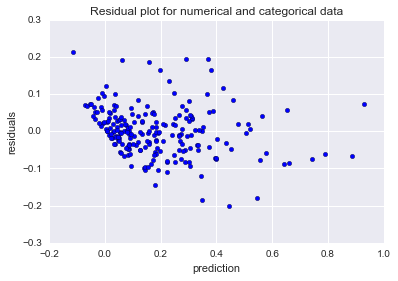

In [53]:
#Plot residuals vs Prediction
plt.scatter(all_pred, res_all)
plt.title("Residual plot for numerical and categorical data")
plt.xlabel("prediction")
plt.ylabel("residuals")

In [54]:
x.shape

(216, 130)

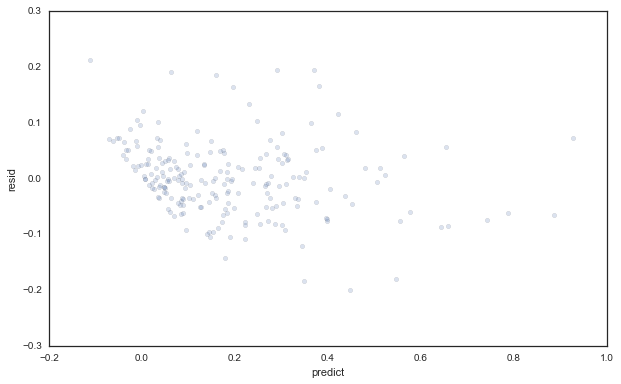

In [55]:
processed_df['predict']=lr.predict(x)
processed_df['resid']= y - processed_df['predict']
with sns.axes_style('white'):
    plot=processed_df.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))



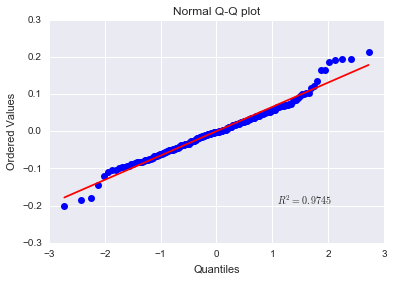

In [56]:
#Q-Q plot
stats.probplot(res_all, dist = 'norm', plot=plt)
plt.title("Normal Q-Q plot")

# Fit: Numeric Features only 


In [77]:
df.head()

,movie_name,domestic_gross,foreign_gross,production_budget,distributor,runtime,rating,directors,writers,actors,month,year
4,Home (2015),1.796302e+08,2.112700e+08,1.366991e+08,Fox,94.0,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']",3,2015
5,Space Chimps,3.355937e+07,3.871269e+07,4.124420e+07,Fox,81.0,G,[u'Kirk De Micco'],[u'Kirk De Micco'],[u'Andy Samberg'],7,2008
6,Fantasia 2000 (IMAX),8.453717e+07,1.204181e+08,1.114983e+08,Warner Bros.,105.0,PG,[],[],[],1,2000
7,Lilo & Stitch,1.945005e+08,1.698941e+08,1.067260e+08,Buena Vista,85.0,PG,"[u'Dean DeBlois', u'Chris Sanders']","[u'Dean DeBlois', u'Chris Sanders']",[],6,2002
10,Bolt,1.271364e+08,2.184008e+08,1.672062e+08,Buena Vista,96.0,PG,[u'Chris Williams'],"[u'Dan Fogelman', u'Chris Williams']","[u'John Travolta', u'Miley Cyrus', u'Nick Swar...",11,2008


In [78]:
numerical_df = df.loc[:,['domestic_gross', 'foreign_gross','production_budget','runtime']]
categorical_df = df.loc[:,['rating','month']]


In [79]:
numerical_df.head()

,domestic_gross,foreign_gross,production_budget,runtime
4,1.796302e+08,2.112700e+08,1.366991e+08,94.0
5,3.355937e+07,3.871269e+07,4.124420e+07,81.0
6,8.453717e+07,1.204181e+08,1.114983e+08,105.0
7,1.945005e+08,1.698941e+08,1.067260e+08,85.0
10,1.271364e+08,2.184008e+08,1.672062e+08,96.0


In [82]:
categorical_df['month'] = categorical_df['month'].apply(lambda x: calendar.month_abbr[x])
categorical_df.head()

,rating,month
4,PG,Mar
5,G,Jul
6,PG,Jan
7,PG,Jun
10,PG,Nov


In [83]:
categorical_patsy =patsy.dmatrix('rating+month',data=categorical_df,return_type='dataframe')
categorical_patsy.head()

,Intercept,rating[T.PG],rating[T.PG-13],rating[T.R],rating[T.Unrated],month[T.Aug],month[T.Dec],month[T.Feb],month[T.Jan],month[T.Jul],month[T.Jun],month[T.Mar],month[T.May],month[T.Nov],month[T.Oct],month[T.Sep]
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [84]:
new_num_df = numerical_df.join(categorical_patsy)

In [85]:
new_num_df.head()

,domestic_gross,foreign_gross,production_budget,runtime,Intercept,rating[T.PG],rating[T.PG-13],rating[T.R],rating[T.Unrated],month[T.Aug],month[T.Dec],month[T.Feb],month[T.Jan],month[T.Jul],month[T.Jun],month[T.Mar],month[T.May],month[T.Nov],month[T.Oct],month[T.Sep]
4,1.796302e+08,2.112700e+08,1.366991e+08,94.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,3.355937e+07,3.871269e+07,4.124420e+07,81.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8.453717e+07,1.204181e+08,1.114983e+08,105.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.945005e+08,1.698941e+08,1.067260e+08,85.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,1.271364e+08,2.184008e+08,1.672062e+08,96.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
new_num_df = new_num_df.drop('Intercept', axis = 1)

In [87]:
new_num_df.head()

,domestic_gross,foreign_gross,production_budget,runtime,rating[T.PG],rating[T.PG-13],rating[T.R],rating[T.Unrated],month[T.Aug],month[T.Dec],month[T.Feb],month[T.Jan],month[T.Jul],month[T.Jun],month[T.Mar],month[T.May],month[T.Nov],month[T.Oct],month[T.Sep]
4,1.796302e+08,2.112700e+08,1.366991e+08,94.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,3.355937e+07,3.871269e+07,4.124420e+07,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8.453717e+07,1.204181e+08,1.114983e+08,105.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.945005e+08,1.698941e+08,1.067260e+08,85.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,1.271364e+08,2.184008e+08,1.672062e+08,96.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [89]:
new_num_df.columns

Index([u'domestic_gross', u'foreign_gross', u'production_budget', u'runtime',
       u'rating[T.PG]', u'rating[T.PG-13]', u'rating[T.R]',
       u'rating[T.Unrated]', u'month[T.Aug]', u'month[T.Dec]', u'month[T.Feb]',
       u'month[T.Jan]', u'month[T.Jul]', u'month[T.Jun]', u'month[T.Mar]',
       u'month[T.May]', u'month[T.Nov]', u'month[T.Oct]', u'month[T.Sep]'],
      dtype='object')

In [90]:
processed_num_df = preprocessing.normalize(new_num_df,axis=0,norm='max')

processed_num_df = pd.DataFrame(processed_num_df)
processed_num_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.262360,0.234167,0.408578,0.746032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.049015,0.042908,0.123274,0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.123471,0.133469,0.333256,0.833333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.284079,0.188307,0.318992,0.674603,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.185690,0.242071,0.499761,0.761905,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [91]:
processed_num_df.columns = [new_num_df.columns]

In [92]:
processed_num_df.columns

Index([u'domestic_gross', u'foreign_gross', u'production_budget', u'runtime',
       u'rating[T.PG]', u'rating[T.PG-13]', u'rating[T.R]',
       u'rating[T.Unrated]', u'month[T.Aug]', u'month[T.Dec]', u'month[T.Feb]',
       u'month[T.Jan]', u'month[T.Jul]', u'month[T.Jun]', u'month[T.Mar]',
       u'month[T.May]', u'month[T.Nov]', u'month[T.Oct]', u'month[T.Sep]'],
      dtype='object')

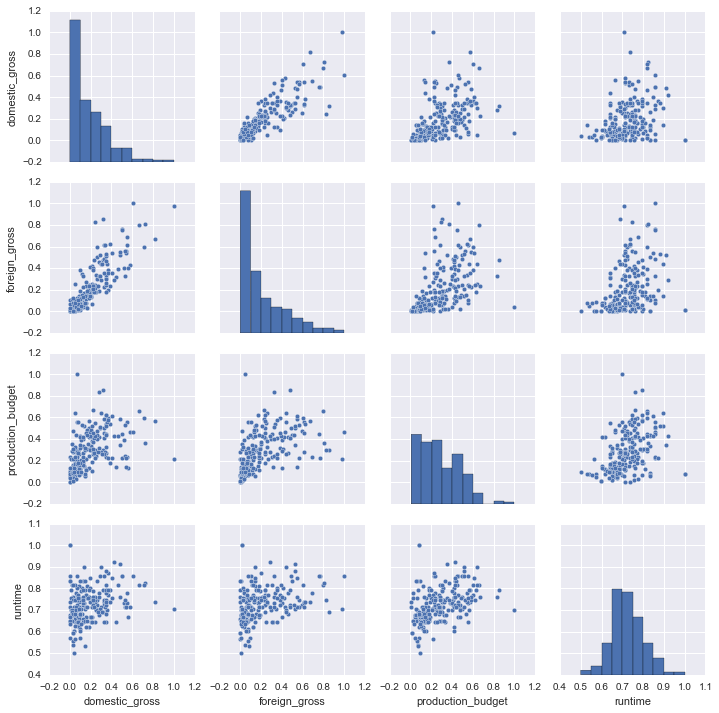

In [169]:
sns.pairplot(processed_num_df[['domestic_gross','foreign_gross', 'production_budget', 'runtime']])

In [98]:
y_numerical = processed_num_df['domestic_gross']
x_numerical = processed_num_df.loc[:, 'foreign_gross':'month[T.Sep]']

In [99]:
y_numerical.head()

0    0.262360
1    0.049015
2    0.123471
3    0.284079
4    0.185690
Name: domestic_gross, dtype: float64

In [100]:
x_numerical.head()

,foreign_gross,production_budget,runtime,rating[T.PG],rating[T.PG-13],rating[T.R],rating[T.Unrated],month[T.Aug],month[T.Dec],month[T.Feb],month[T.Jan],month[T.Jul],month[T.Jun],month[T.Mar],month[T.May],month[T.Nov],month[T.Oct],month[T.Sep]
0,0.234167,0.408578,0.746032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.042908,0.123274,0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.133469,0.333256,0.833333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.188307,0.318992,0.674603,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.242071,0.499761,0.761905,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [101]:
x_numerical.std()[1]

0.18785673784215762

In [103]:
processed_num_df.shape

(216, 19)

In [105]:
processed_num_df.corr()

,domestic_gross,foreign_gross,production_budget,runtime,rating[T.PG],rating[T.PG-13],rating[T.R],rating[T.Unrated],month[T.Aug],month[T.Dec],month[T.Feb],month[T.Jan],month[T.Jul],month[T.Jun],month[T.Mar],month[T.May],month[T.Nov],month[T.Oct],month[T.Sep]
domestic_gross,1.000000,0.863406,0.487713,0.294157,-0.023229,-0.120885,-0.136434,-0.125735,-0.152384,-0.147768,-0.119559,-0.056592,-0.038812,0.273961,0.066057,0.245938,0.096502,-0.130648,-0.141640
foreign_gross,0.863406,1.000000,0.524294,0.358732,0.054228,-0.103458,-0.146300,-0.088915,-0.162054,-0.153128,-0.154294,-0.028826,0.081263,0.250485,0.062542,0.225586,0.022841,-0.113570,-0.132427
production_budget,0.487713,0.524294,1.000000,0.412474,0.180477,-0.055372,-0.197867,-0.118353,-0.148035,-0.195417,-0.214420,-0.015903,0.013325,0.218586,0.108500,0.183472,0.183704,-0.149033,-0.147712
runtime,0.294157,0.358732,0.412474,1.000000,0.126576,0.181888,0.059052,-0.082921,-0.032931,-0.011175,-0.140147,0.026279,-0.017645,0.080422,0.094958,0.038174,0.051493,-0.004035,-0.047264
rating[T.PG],-0.023229,0.054228,0.180477,0.126576,1.000000,-0.280265,-0.241558,-0.169600,-0.017226,0.009757,-0.136033,0.096119,0.059237,-0.129150,0.094721,0.113618,0.002506,0.040636,0.036078
rating[T.PG-13],-0.120885,-0.103458,-0.055372,0.181888,-0.280265,1.000000,-0.033150,-0.023275,0.066078,0.038136,-0.051630,-0.026939,0.086672,-0.077231,0.033718,-0.053575,-0.047696,0.059456,0.042860
rating[T.R],-0.136434,-0.146300,-0.197867,0.059052,-0.241558,-0.033150,1.000000,-0.020060,0.088988,0.059761,-0.044499,-0.023218,0.029881,0.016067,-0.049404,-0.046176,-0.024291,-0.040996,0.064646
rating[T.Unrated],-0.125735,-0.088915,-0.118353,-0.082921,-0.169600,-0.023275,-0.020060,1.000000,-0.027491,0.117485,-0.031243,-0.016302,-0.041959,-0.046736,-0.034687,-0.032420,-0.064285,-0.028784,0.278815
month[T.Aug],-0.152384,-0.162054,-0.148035,-0.032931,-0.017226,0.066078,0.088988,-0.027491,1.000000,-0.065519,-0.060983,-0.031819,-0.081898,-0.091222,-0.067704,-0.063280,-0.125476,-0.056182,-0.063280
month[T.Dec],-0.147768,-0.153128,-0.195417,-0.011175,0.009757,0.038136,0.059761,0.117485,-0.065519,1.000000,-0.074462,-0.038851,-0.100000,-0.111384,-0.082669,-0.077267,-0.153209,-0.068599,-0.077267


In [107]:
#OLS fit for just numerical data
lsm_num = sm.OLS(y_numerical,x_numerical).fit()
lsm_num.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     97.51
Date:                Thu, 26 Jan 2017   Prob (F-statistic):           5.37e-88
Time:                        14:04:06   Log-Likelihood:                 235.28
No. Observations:                 216   AIC:                            -434.6
Df Residuals:                     198   BIC:                            -373.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
foreign_gross         0.6537      0.034     19.323      0.000         0.587     0.720
production_budget     0.0123      0.041      0.298      0.766        -0.069     0.094
runtime               0.0199      0.040      0.496      0.621        -0.059     0.099
rating[T.PG]         -0.0434      0.015     -2.884      0.004        -0.073    -0.014
rating[T.PG-13]      -0.0559      0.034     -1.625      0.106        -0.124     0.012
rating[T.R]          -0.0475      0.039     -1.223      0.223        -0.124     0.029
rating[T.Unrated]    -0.1079      0.054     -1.999      0.047        -0.214    -0.001
month[T.Aug]          0.0551      0.037      1.509      0.133        -0.017     0.127
month[T.Dec]          0.0625      0.034      1.833      0.068        -0.005     0.130
month[T.Feb]          0.0575      0.034      1.708      0.089        -0.009     0.124
month[T.Jan]          0.0337      0.050      0.669      0.504        -0.066     0.133
month[T.Jul]          0.0205      0.031      0.659      0.511        -0.041     0.082
month[T.Jun]          0.0878      0.031      2.863      0.005         0.027     0.148
month[T.Mar]          0.0801      0.034      2.369      0.019         0.013     0.147
month[T.May]          0.1103      0.035      3.174      0.002         0.042     0.179
month[T.Nov]          0.0888      0.029      3.105      0.002         0.032     0.145
month[T.Oct]          0.0433      0.036      1.203      0.231        -0.028     0.114
month[T.Sep]          0.0652      0.035      1.858      0.065        -0.004     0.134
==============================================================================
Omnibus:                       18.508   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.302
Skew:                           0.412   Prob(JB):                     7.94e-09
Kurtosis:                       4.862   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
lr  = LinearRegression()
lr.fit(x_numerical,y_numerical)
lr.score(x_numerical,y_numerical)

0.7849807282425858

**Checking Predictions for numerical data**

**Assumption #1 : Regression is linear in parameters & correctly specified**

In [111]:
pred_num = lr.predict(x_numerical)
pred_num

array([ 0.20989486,  0.06334035,  0.09584714,  0.1862934 ,  0.22469178,
        0.26838322,  0.06329954,  0.12531298,  0.06920235,  0.02939164,
        0.35585971,  0.31248225,  0.27316457,  0.08159695,  0.05140679,
        0.13200259,  0.05642762,  0.36002773,  0.10845943,  0.04370918,
        0.13606676,  0.0869941 , -0.01010691,  0.06329954,  0.38395465,
        0.05495916,  0.30333819,  0.40576373,  0.25517599,  0.14511082,
        0.13890826,  0.06659325,  0.16514112,  0.20412106,  0.05212745,
        0.04301479,  0.39201604,  0.44454207,  0.49481011, -0.01949301,
        0.16386077,  0.08812396,  0.01645049,  0.13126483,  0.22332491,
        0.09949063,  0.39108021,  0.37085207,  0.63156602,  0.28486838,
        0.47521006,  0.46763449,  0.16657189,  0.3679875 ,  0.26225919,
        0.02576515,  0.30684305,  0.07947263,  0.29697789,  0.05884138,
        0.15105177,  0.21324242,  0.03779031,  0.10160207,  0.16516329,
        0.14066195,  0.07623389,  0.38607141,  0.16480905,  0.18

In [118]:
res_num = y_numerical - pred_num

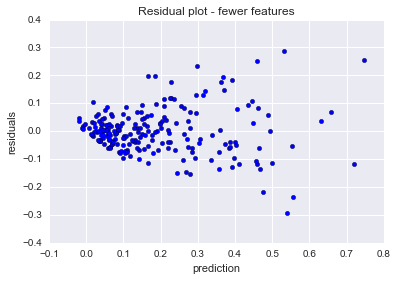

In [119]:
plt.scatter(pred_num, res_num)
plt.title("Residual plot - fewer features")
plt.xlabel("prediction")
plt.ylabel("residuals")

**Assumption 2 :**
**Residuals ( ei=Yi−Ŷ i ) should be normally distributed with zero mean**

**We can check this assumption as follows by plotting our residuals vs Ŷ :**

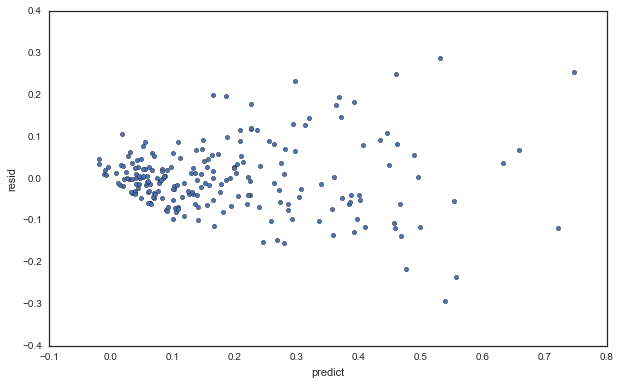

In [120]:
processed_num_df['predict']=lr.predict(x_numerical)
processed_num_df['resid']= y_numerical - processed_num_df['predict']
with sns.axes_style('white'):
    plot=processed_num_df.plot(kind='scatter',x='predict',y='resid',alpha=1,figsize=(10,6))

** We can diagnose/ inspect our normality assumption using qqplot:**

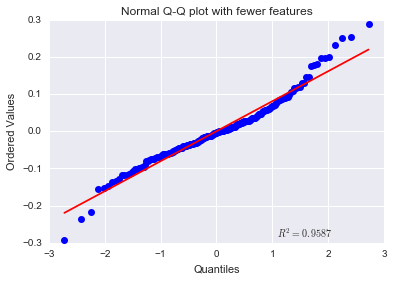

In [122]:
stats.probplot(res_num, dist = 'norm', plot=plt)
plt.title("Normal Q-Q plot with fewer features")

In [127]:
X_nu_train, X_nu_test, y_nu_train, y_nu_test = train_test_split(x_numerical, y_numerical, test_size=0.3)

**Linear Regression, Lasso CV, plot training and test error - with fewer features **

In [150]:
est = LinearRegression()
est.fit(X_nu_train, y_nu_train)
est.score(X_nu_train, y_nu_train), est.score(X_nu_test, y_nu_test)

(0.77803043508197989, 0.76685172446482974)

In [166]:
est = LassoCV()
est.fit(X_nu_train, y_nu_train)
est.score(X_nu_train, y_nu_train), est.score(X_nu_test, y_nu_test)

(0.75076625343217052, 0.73545922614753201)

In [167]:
est.alpha_

0.0021055572005911319

In [151]:
est.coef_

array([  6.37875812e-01,   1.82873780e-02,  -2.66373873e-02,
        -5.29837421e-02,  -6.52563573e-02,  -3.79655131e-02,
        -1.19233185e-01,   4.61482292e-02,   4.38011758e-02,
         4.30377320e-02,   1.96824620e-02,  -4.22904631e-04,
         6.30454560e-02,   4.61515984e-02,   6.37187521e-02,
         7.27697093e-02,   2.53648291e-02,   4.85310353e-02])

In [165]:
zipped=zip(est.coef_,x_numerical.columns)
features=sorted(zipped, reverse = True)
features

[(0.61302912009028354, 'foreign_gross'),
 (0.047025031278231134, 'rating[T.R]'),
 (0.033212493393323654, 'month[T.Sep]'),
 (0.028313848355578652, 'rating[T.PG]'),
 (0.010572219964906369, 'production_budget'),
 (0.0, 'runtime'),
 (0.0, 'rating[T.Unrated]'),
 (-0.0, 'rating[T.PG-13]'),
 (0.0, 'month[T.Oct]'),
 (-0.0, 'month[T.Nov]'),
 (-0.0, 'month[T.Jun]'),
 (-0.0, 'month[T.Jul]'),
 (0.0, 'month[T.Jan]'),
 (0.0, 'month[T.Feb]'),
 (0.0, 'month[T.Aug]'),
 (-0.0078894009389254838, 'month[T.May]'),
 (-0.030777387279624147, 'month[T.Mar]'),
 (-0.039522063741486618, 'month[T.Dec]')]

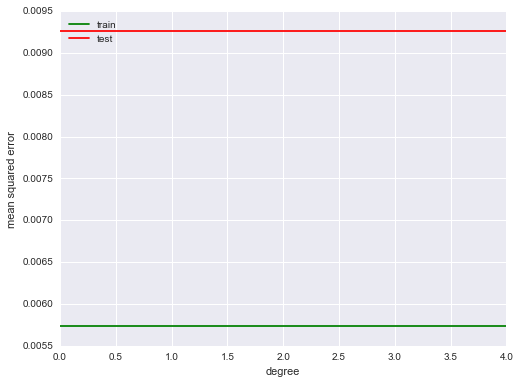

In [128]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error

# Step through degrees from 0 to 9 and store the training and test (generalization) error.
# create array of zeros,
train_error = np.empty(5)
test_error = np.empty(5)
for degree in range(5):
    est = LinearRegression()
    est.fit(X_nu_train, y_nu_train)
    train_error[degree] = mean_squared_error(y_nu_train, est.predict(X_nu_train))
    test_error[degree] = mean_squared_error(y_nu_test, est.predict(X_nu_test))

# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(5), train_error, color='green', label='train')
plt.plot(np.arange(5), test_error, color='red', label='test')
# plt.ylim((0.0, 1e0))
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')

In [130]:
from sklearn.linear_model import Lasso
from sklearn.cross_validation import KFold

all_scores=[]
kf = KFold(n=len(x_numerical), n_folds=3, shuffle=True)

alphas=[1e-8,1e-4,1e-2,1,10]
#X_nu_train, X_nu_test, y_nu_train, y_nu_test

for train, test in kf:
    x_nu_train=x_numerical.iloc[train]
    y_nu_train=y_numerical.iloc[train]
    x_nu_test=x_numerical.iloc[test]
    y_nu_test=y_numerical.iloc[test]
    mse_score=[]
    for a in alphas:
        est=Lasso(alpha=a)
        est.fit(x_nu_train,y_nu_train)
        mse=np.mean((y_nu_test-est.predict(x_nu_test))**2)
        mse_score.append(mse)
    all_scores.append(mse_score)

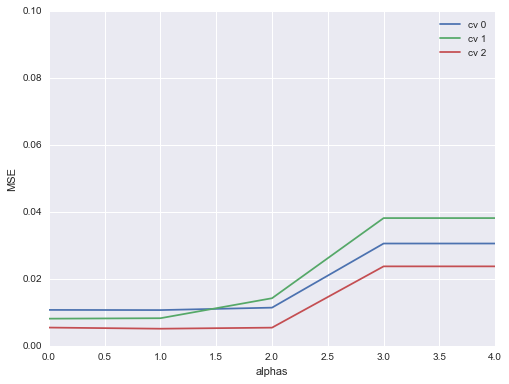

In [131]:
plt.figure(figsize=(8,6))
plt.ylim(0,0.1)
plt.legend()
for i in range(3):
    plt.plot(all_scores[i],label = 'cv %s'%i)
plt.legend()
plt.xlabel('alphas')
plt.ylabel('MSE')
plt.show()

In [133]:
X_nu_train, X_nu_test, y_nu_train, y_nu_test = train_test_split(x_numerical, y_numerical, test_size=0.3)

est=LassoCV()
est.fit(X_nu_train,y_nu_train)

est.alpha_



0.0021055572005911319

In [134]:
print est.score(X_nu_train,y_nu_train)
print est.score(X_nu_test,y_nu_test)

0.750766253432
0.735459226148


In [139]:
zipped=zip(est.coef_,x_numerical.columns)


features_num = sorted(zipped,reverse=True)
features_num


[(0.60436110253556097, 'foreign_gross'),
 (0.034038991397112341, 'month[T.Nov]'),
 (0.020766335131902364, 'month[T.Jun]'),
 (-0.0, 'runtime'),
 (-0.0, 'rating[T.Unrated]'),
 (-0.0, 'rating[T.R]'),
 (-0.0, 'rating[T.PG-13]'),
 (0.0, 'production_budget'),
 (-0.0, 'month[T.Sep]'),
 (-0.0, 'month[T.Oct]'),
 (0.0, 'month[T.May]'),
 (0.0, 'month[T.Mar]'),
 (-0.0, 'month[T.Jan]'),
 (0.0, 'month[T.Feb]'),
 (-0.0, 'month[T.Dec]'),
 (-0.0, 'month[T.Aug]'),
 (-0.019762249662977467, 'month[T.Jul]'),
 (-0.020043113198230825, 'rating[T.PG]')]

In [140]:
features_num[:5]

[(0.60436110253556097, 'foreign_gross'),
 (0.034038991397112341, 'month[T.Nov]'),
 (0.020766335131902364, 'month[T.Jun]'),
 (-0.0, 'runtime'),
 (-0.0, 'rating[T.Unrated]')]

Seaborn plot

In [ ]:
sns.pairplot(cars[['log_price','engine_log', 'curb_weight', 'horsepower', 'width', 'length', 'wheel_base','bore']])

**Domestic gross vs Production Budget**

In [141]:
y_numerical.head()

0    0.262360
1    0.049015
2    0.123471
3    0.284079
4    0.185690
Name: domestic_gross, dtype: float64

In [143]:
x_numerical.head()

,foreign_gross,production_budget,runtime,rating[T.PG],rating[T.PG-13],rating[T.R],rating[T.Unrated],month[T.Aug],month[T.Dec],month[T.Feb],month[T.Jan],month[T.Jul],month[T.Jun],month[T.Mar],month[T.May],month[T.Nov],month[T.Oct],month[T.Sep]
0,0.234167,0.408578,0.746032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.042908,0.123274,0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.133469,0.333256,0.833333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.188307,0.318992,0.674603,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.242071,0.499761,0.761905,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


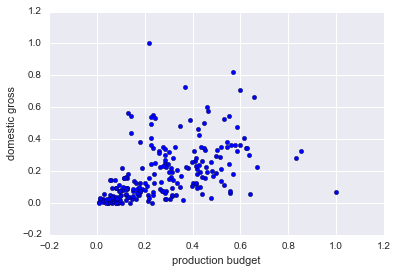

In [163]:
plt.scatter(x_numerical.production_budget,y_numerical)
plt.xlabel('production budget')
plt.ylabel('domestic gross')


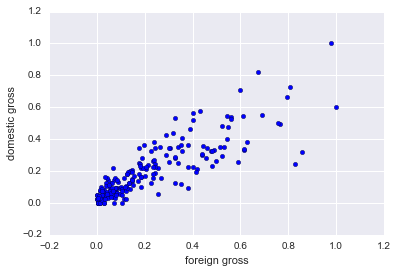

In [168]:
plt.scatter(x_numerical.foreign_gross,y_numerical)
plt.xlabel('foreign gross')
plt.ylabel('domestic gross')

# Train vs Test for categorical+numerical


In [125]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [145]:
est = LinearRegression()
est.fit(X_train, y_train)
est.score(X_train, y_train), est.score(X_test, y_test)

(0.9808950753741843, -2.3444850543040067e+26)

In [160]:
est = LassoCV()
est.fit(X_train, y_train)
est.score(X_train, y_train), est.score(X_test, y_test)

(0.90107427397771689, 0.75121596252291933)

In [162]:
zipped=zip(est.coef_,x.columns)
features=sorted(zipped, reverse = True)
features[:10]
#print features[-15:]

[(0.61302912009028354, 'foreign_gross'),
 (0.18029850120306867, "directors[T.[u'Rob Minkoff']]"),
 (0.15848699869290045, 'distributor[T.Universal]'),
 (0.14957209867329932,
  "directors[T.[u'Andrew Adamson', u'Kelly Asbury', u'Conrad Vernon']]"),
 (0.13864522853719091, "directors[T.[u'Andrew Stanton']]"),
 (0.093614549914191783, "directors[T.[u'Robert Zemeckis']]"),
 (0.089449247509210725,
  "directors[T.[u'Pete Docter', u'David Silverman', u'Lee Unkrich']]"),
 (0.088554838997709093, "directors[T.[u'John Lasseter']]"),
 (0.077754720359794097, "directors[T.[u'Phil Lord', u'Chris Miller (II)']]"),
 (0.052277617513309067, "directors[T.[u'John Lasseter', u'Lee Unkrich']]")]

**To get actual coefficients, put these top features in OLS and get the pre-normalized corfficients**

In [149]:
est.alpha_

0.00093143251183841469

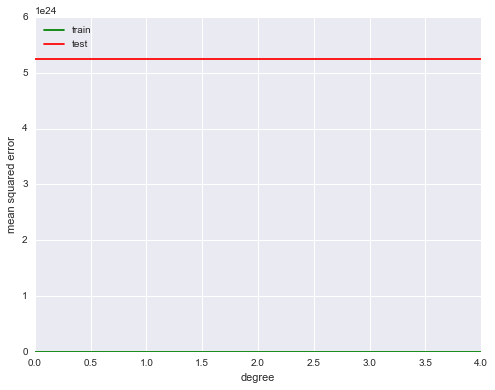

In [126]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error

# Step through degrees from 0 to 9 and store the training and test (generalization) error.
# create array of zeros,
train_error = np.empty(5)
test_error = np.empty(5)
for degree in range(5):
    est = LinearRegression()
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(5), train_error, color='green', label='train')
plt.plot(np.arange(5), test_error, color='red', label='test')
# plt.ylim((0.0, 1e0))
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')

In [61]:
from sklearn.linear_model import Lasso
from sklearn.cross_validation import KFold

all_scores=[]
kf = KFold(n=len(X), n_folds=3, shuffle=True)

alphas=[1e-8,1e-4,1e-2,1,10]


for train, test in kf:
    x_train=x.iloc[train]
    y_train=y.iloc[train]
    x_test=x.iloc[test]
    y_test=y.iloc[test]
    mse_score=[]
    for a in alphas:
        est=Lasso(alpha=a)
        est.fit(x_train,y_train)
        mse=np.mean((y_test-est.predict(x_test))**2)
        mse_score.append(mse)
    all_scores.append(mse_score)


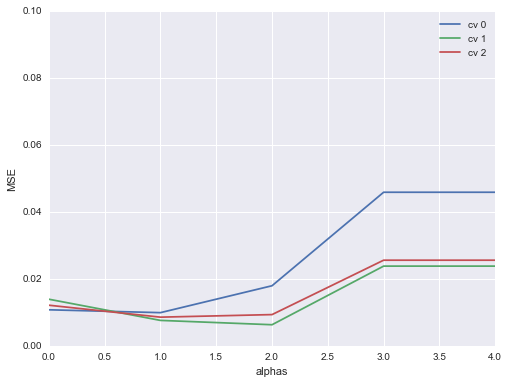

In [62]:
plt.figure(figsize=(8,6))
plt.ylim(0,0.1)
plt.legend()
for i in range(3):
    plt.plot(all_scores[i],label = 'cv %s'%i)
plt.legend()
plt.xlabel('alphas')
plt.ylabel('MSE')
plt.show()

In [124]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

est=Lasso(alpha=1) #alpha should be 1e-2
est.fit(X_train,y_train)
est.alpha

# zipped=zip(x.columns,est.coef_)
# features=sorted(zipped,key = lambda t: t[1],reverse=True)
# features[:5]

zipped=zip(est.coef_,x.columns)
features=sorted(zipped)
print features[:5]

features=sorted(zipped,reverse=True)
features[:5]

features_0 = []
for i in features:
    if i[0] == 0.0 or i[0] == -0.0:
        features_0.append(i[1])
features_0

[(0.0, "directors[T.[u'Andrew Adamson', u'Kelly Asbury', u'Conrad Vernon']]"), (0.0, "directors[T.[u'Andrew Adamson']]"), (0.0, "directors[T.[u'Andrew Stanton', u'Lee Unkrich']]"), (0.0, "directors[T.[u'Andrew Stanton']]"), (0.0, "directors[T.[u'Barry Cook']]")]


['runtime',
 'rating[T.Unrated]',
 'rating[T.R]',
 'rating[T.PG]',
 'rating[T.PG-13]',
 'production_budget',
 'month[T.Sep]',
 'month[T.Oct]',
 'month[T.Nov]',
 'month[T.May]',
 'month[T.Mar]',
 'month[T.Jun]',
 'month[T.Jul]',
 'month[T.Jan]',
 'month[T.Feb]',
 'month[T.Dec]',
 'month[T.Aug]',
 'foreign_gross',
 'distributor[T.Yash Raj]',
 'distributor[T.Weinstein Company]',
 'distributor[T.Warner Independent]',
 'distributor[T.Warner Bros.]',
 'distributor[T.Universal]',
 'distributor[T.Triumph]',
 'distributor[T.Summit Entertainment]',
 'distributor[T.Sony Classics]',
 'distributor[T.Sony / Columbia]',
 'distributor[T.Shout! Factory]',
 'distributor[T.Relativity]',
 'distributor[T.Paramount]',
 'distributor[T.Paramount (DreamWorks)]',
 'distributor[T.Open Road Films]',
 'distributor[T.Miramax]',
 'distributor[T.Millennium Ent.]',
 'distributor[T.MGM]',
 'distributor[T.MGM (Weinstein)]',
 'distributor[T.Lionsgate]',
 'distributor[T.KKM]',
 'distributor[T.GKIDS]',
 'distributor[T.Fox]